## Práctica 2

## Librerias

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Datos

In [25]:
# Lecturas de Fondo
tiempo = [60,120,180,240,300]
cuentas = [20,15,13,13,10]
Fondo = pd.DataFrame(tiempo, columns = ['Tiempo'])
Fondo['Cuentas'] = cuentas
Fondo

,Tiempo,Cuentas
0,60,20
1,120,15
2,180,13
3,240,13
4,300,10


## 2.- Prueba de funcionamiento y lectura del fondo ambiental.

In [26]:
# Promedio 
Lf = Fondo.mean()[1]
Lf

14.2

In [27]:
# Desviación estándar
dsv_std = Fondo.std()[1]
dsv_std

3.7013511046643495

## 3.- Penetración de la radiación alfa.

In [28]:
def val_norm(val,lf:float)->list:
    """
    Función que calcula el valor neto normalizado, recibe una lista o una columna de un 
    dataframe, asi como el promedio del fondo (lf) y calcula el valor normalizado para cada uno de los
    valores ingresados en la lista val, regresa una lista con los valores netos normalizados.
    """
    l0 = val[0]
    n_norm = []
    for i in np.arange(len(val)):
        lN = (val[i]-lf)/(l0-lf)
        n_norm.append(lN)
    return n_norm

### Promedios radiación alfa $(Am-241)$ 

Con cada barrera se tomaron 3 mediciones, la tabla a continuación correspone al promedio con cada numero de barreras (tanto de aluminio como de Papel)

In [29]:
L = ['L_0', 'L_1', 'L_2', 'L_3']

In [30]:
Prom_Alfa = pd.DataFrame(L,columns=['No. de Barreras'])
Prom_Alfa['Aluminio'] = [14979.67,427.33,405,415.67]
Prom_Alfa['Papel'] = [14979,415.67,405.67,391.67]
Prom_Alfa

,No. de Barreras,Aluminio,Papel
0,L_0,14979.67,14979.00
1,L_1,427.33,415.67
2,L_2,405.00,405.67
3,L_3,415.67,391.67


In [31]:
# valor normailizao para aluminio
aluminio_n = val_norm(Prom_Alfa['Aluminio'],Lf)
aluminio_n

[1.0, 0.027605547971430233, 0.02611344648714675, 0.02682642108801127]

In [32]:
# Valor normalizado para papel
papel_n = val_norm(Prom_Alfa['Papel'],Lf)
papel_n

[1.0, 0.026827622153319793, 0.026159387362343637, 0.025223858654977015]

## 5.- Penetración de la radiación beta fuerte

### Promedios radiación beta fuerte $(Sr-90/Y-90)$ 

In [33]:
L = ['L_0', 'L_1', 'L_2', 'L_3', 'L_4', 'L_5']

In [34]:
Prom_Beta = pd.DataFrame(L,columns=['No. de Barreras'])
Prom_Beta['Acrilico'] = [5306.33,1062.67,86.67,10.33,14.67,10.67]
Prom_Beta['Aluminio'] = [5306.33,20.33,8.33,9,"Na","Na"]
Prom_Beta

,No. de Barreras,Acrilico,Aluminio
0,L_0,5306.33,5306.33
1,L_1,1062.67,20.33
2,L_2,86.67,8.33
3,L_3,10.33,9
4,L_4,14.67,Na
5,L_5,10.67,Na


In [35]:
acrilico_n = val_norm(Prom_Beta['Acrilico'],lf=Lf)
acrilico_n

[1.0,
 0.19811871590456018,
 0.013693919083620394,
 -0.0007312745529682754,
 8.881112141991988e-05,
 -0.0006670282098134398]

In [36]:
beta_al = Prom_Beta['Aluminio']
beta_al = beta_al.drop([4,5])
al_n = val_norm(beta_al,lf=Lf)
al_n

[1.0, 0.0011583237751151235, -0.0011091942185849552, -0.0009825911306033674]

# Resultados

## Curvas de absorción

### Radiación alfa


se utiliza como espesor el valor de la masa por unidad de superficie denominado "espesor másico $x_m$", expresado en $g/cm2$:

$espesor\ másico = x_m = x(cm) \cdot \rho (g/cm3)$

In [37]:
# Valores de espesor másico para aluminio y papel
mas_a_a = [0,2.13,4.26,6.39]
mas_p_a = [0,1.25,2.5,3.75]

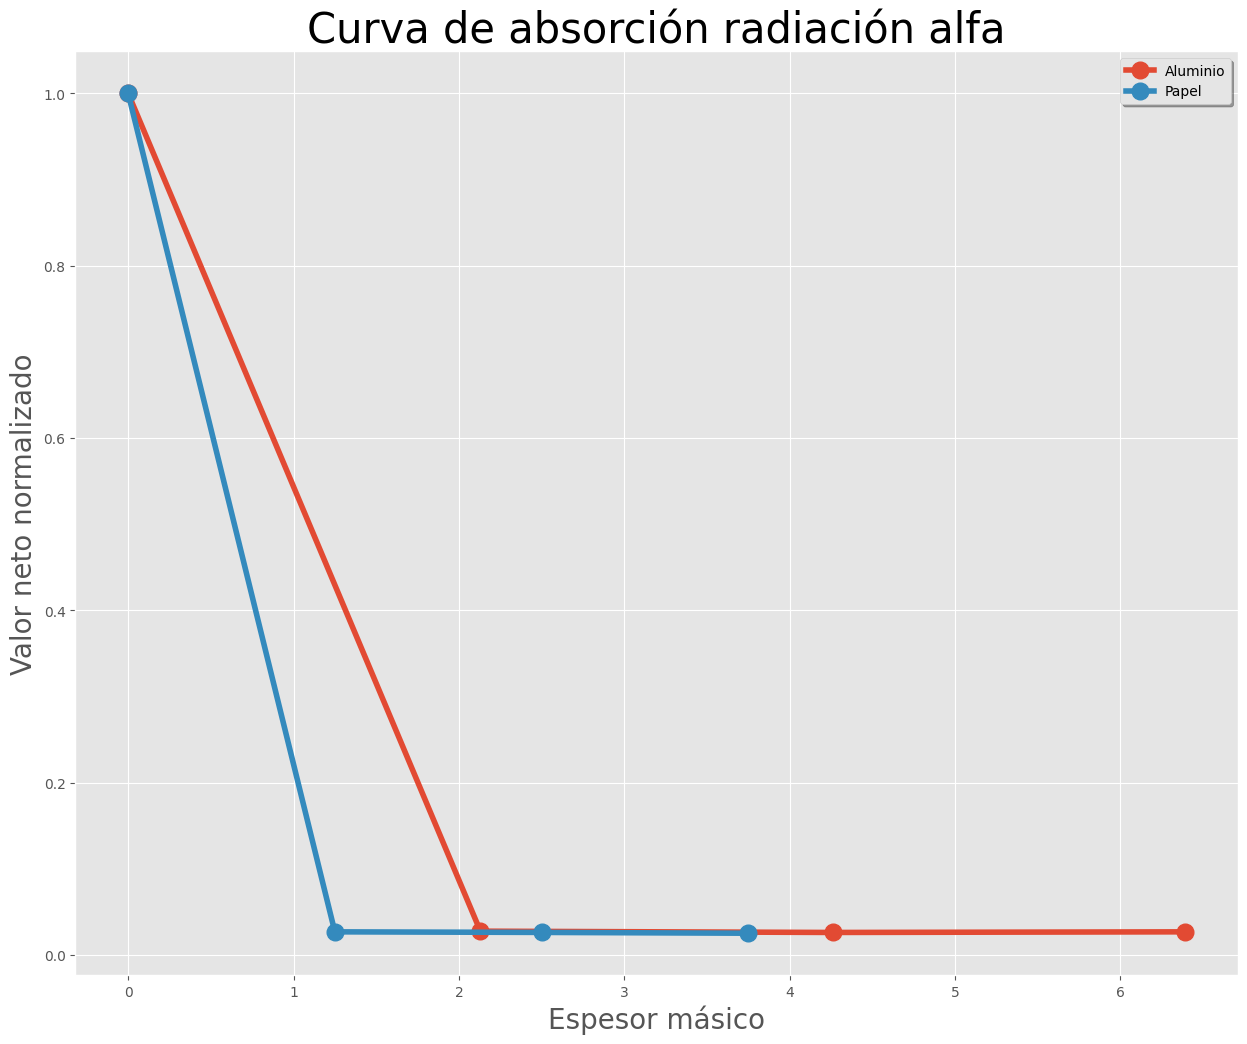

In [39]:
fig, ax = plt.subplots(figsize=(15, 12))
l1, = ax.plot(mas_a_a, aluminio_n,linewidth=4,marker='o',markersize=12)
l2, = ax.plot(mas_p_a,papel_n,linewidth=4,marker='o',markersize=12)
ax.legend((l1,l2), ('Aluminio','Papel'), loc='upper right', shadow=True)
ax.set_xlabel('Espesor másico',fontsize=20)
ax.set_ylabel('Valor neto normalizado',fontsize=20)
ax.set_title('Curva de absorción radiación alfa',fontsize=30)
plt.show()

### Radiación Beta Fuerte

In [42]:
mas_ac_b = [0,2.13,4.26,6.39,8.52,10.65]
mas_al_b = [0,4,8,12]

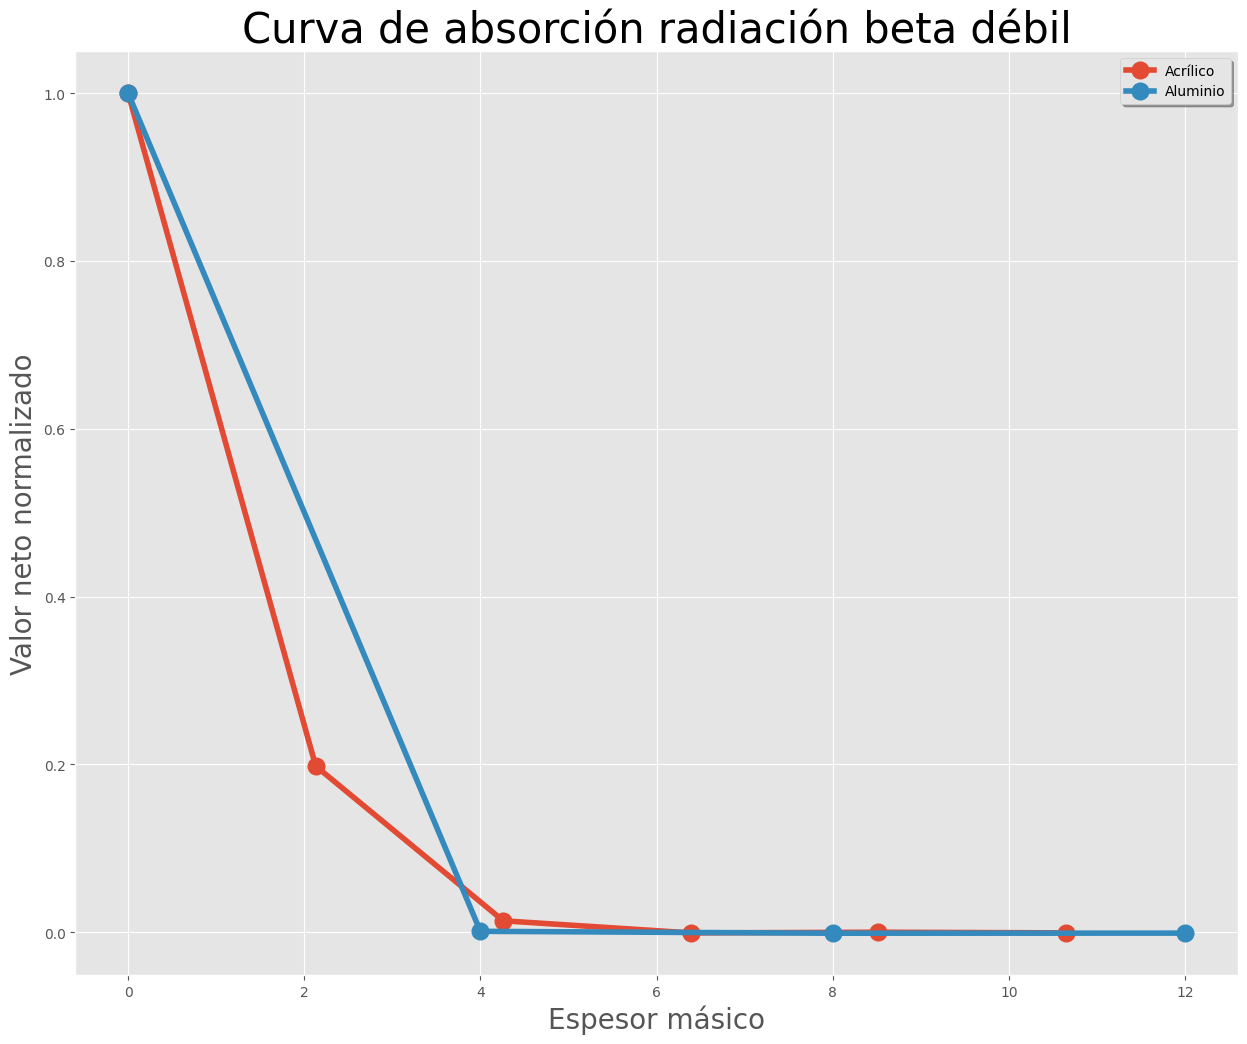

In [43]:
fig, ax = plt.subplots(figsize=(15, 12))
l1, = ax.plot(mas_ac_b, acrilico_n,linewidth=4,marker='o',markersize=12)
l2, = ax.plot(mas_al_b,al_n,linewidth=4,marker='o',markersize=12)
ax.legend((l1,l2), ('Acrílico','Aluminio'), loc='upper right', shadow=True)
ax.set_xlabel('Espesor másico',fontsize=20)
ax.set_ylabel('Valor neto normalizado',fontsize=20)
ax.set_title('Curva de absorción radiación beta débil',fontsize=30)
plt.show()